# CNN Avec peu de données

#### Chargement du code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import time
np.random.seed(123) # for reproducibility
from sklearn.metrics import confusion_matrix
# from utilitaire import affiche
import tensorflow as tf
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Dense, Flatten, Dropout, Convolution2D, MaxPooling2D

# Chargement et mise en forme des données
DATA_PATH = 'Data'
categories = ["accordion", "anchor", "barrel", "binocular"]
for i in range(len(categories)):
    categories[i] = DATA_PATH + '/' + categories[i]

data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(category)
              for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg', '.png', '.jpeg']]
    
    for img_path in images:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
        x = np.array(img)
        x = np.expand_dims(x, axis=0)
        data.append({'x': np.array(x[0]), 'y': c})

num_classes = len(categories)
random.shuffle(data)

# create train / val / test split
train_split = 0.7
idx_train = int(train_split * len(data))
train = data[:idx_train]
test = data[idx_train:]

# separate data and labels
X_train, y_train = np.array([t['x'] for t in train]), [t['y'] for t in train]
X_test, y_test = np.array([t['x'] for t in test]), [t['y'] for t in test]

# normalize data
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# convert labels to one-hot vectors
Y_train = tf.keras.utils.to_categorical(y_train, num_classes)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('finished loading', len(data), 'images from', num_classes, 'categories')
print('train / test split:', len(X_train), len(X_test))
print('training data shape: ', X_train.shape)
print('training label shape: ', len(y_train))
shape = X_train[0].shape


finished loading 177 images from 4 categories
train / test split: 123 54
training data shape:  (123, 224, 224, 3)
training label shape:  123


Redimensionnement sur les images de X_train  
pour y_train on passe du label brut au vecteur one-hot (classification multiclass)

In [ ]:
def CNN(shape):
    inputs = Input(shape)
    x= inputs
    x=Convolution2D(32,(3, 3), activation='relu',padding='same')(x)
    x=Dropout(0.2)(x)
    x=MaxPooling2D(pool_size=(3, 3), strides=2,padding='same')(x)
    x=Convolution2D(64,(3, 3), activation='relu',padding='same')(x)
    x=Dropout(0.3)(x)
    x=MaxPooling2D(pool_size=(3, 3), strides=2,padding='same')(x)
    x=Convolution2D(128,(3, 3), activation='relu',padding='same')(x)
    x=Dropout(0.3)(x)
    x=MaxPooling2D(pool_size=(3, 3), strides=2,padding='same')(x)
    x=Flatten()(x)
    x=Dense(100, activation='relu')(x)
    x=Dropout(0.4)(x)
    x=Dense(32, activation='relu')(x)
    x=Dropout(0.5)(x)
    outputs=Dense(4, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model
model = CNN(shape)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │    10,035,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         3,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,131,912 (38.65 MB)

 Trainable params: 10,131,912 (38.65 MB)

 Non-trainable params: 0 (0.00 B)

20,090,296 params à estimer  


In [3]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam

lr_schedulerBis = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
earlStopBis = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, restore_best_weights=True, verbose = 1, mode="min", start_from_epoch=20)

model.compile(
    optimizer= Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    Y_train,
    epochs=64,
    validation_split=0.2,
    batch_size=16,
    callbacks=[earlStopBis, lr_schedulerBis],
    verbose=1
)

Epoch 1/64
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 294ms/step - accuracy: 0.3061 - loss: 5.4825 - val_accuracy: 0.4800 - val_loss: 1.3617 - learning_rate: 0.0010
Epoch 2/64
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step - accuracy: 0.3776 - loss: 1.2824 - val_accuracy: 0.4400 - val_loss: 1.1626 - learning_rate: 0.0010
Epoch 3/64
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - accuracy: 0.3571 - loss: 1.3503 - val_accuracy: 0.3600 - val_loss: 1.3844 - learning_rate: 0.0010
Epoch 4/64
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - accuracy: 0.3469 - loss: 1.2580 - val_accuracy: 0.6000 - val_loss: 1.1674 - learning_rate: 0.0010
Epoch 5/64
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - accuracy: 0.5000 - loss: 1.1761 - val_accuracy: 0.6400 - val_loss: 1.0535 - learning_rate: 0.0010
Epoch 6/64
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 279ms/step - accuracy: 0.4286 - loss: 1.1559 - val_accuracy: 0.6800 - val_loss: 1.1051 - learning_rate: 0.0010
Epoch 7/64
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step - accuracy: 0.5918 - loss: 0.9529 - val_accuracy: 

Premier essaie: 
- Clairement overfitting: loss value stagne vite, l'accuracy est de 1 en train, mais .85 en test


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5741 - loss: 1.0278
Test loss: 1.0277867317199707, Test accuracy: 0.5740740895271301


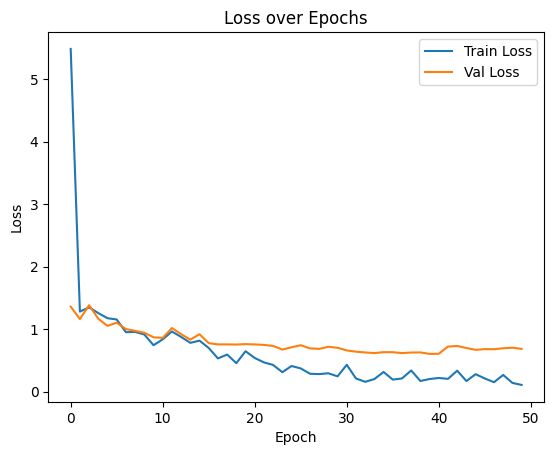

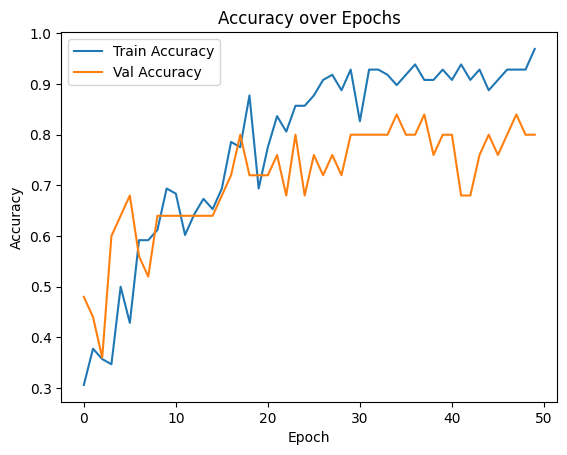

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.78      0.39      0.52        18
           2       0.37      0.58      0.45        12
           3       0.44      0.40      0.42        10

    accuracy                           0.57        54
   macro avg       0.59      0.58      0.56        54
weighted avg       0.62      0.57      0.57        54



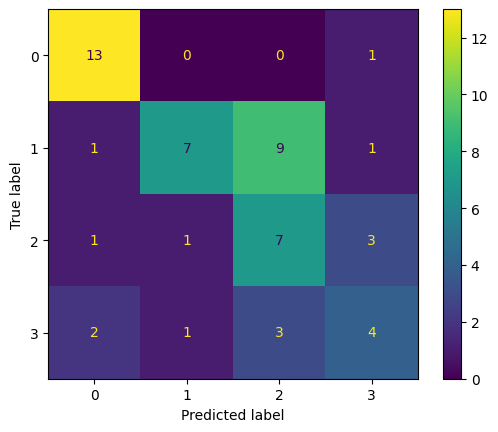

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Evaluation
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# Plotting losses
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.show()

# Plotting accuracies
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

# Predictions
Y_pred = model.predict(X_test)
y_true_classes = np.argmax(Y_test, axis=1)
y_pred_classes = np.argmax(Y_pred, axis=1)

# Metrics
print(classification_report(y_true_classes, y_pred_classes))
cm = confusion_matrix(y_true_classes, y_pred_classes)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()